In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
# import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")
print("✔️ All Libraries imported")

✔️ All Libraries imported


In [19]:
df=pd.read_csv("Cars1.csv")

In [20]:
df.head()

,Unnamed: 0,brand,model,model_year,fuel_type,ext_col,int_col,accident,clean_title,horsepower,Displacement,Cylinders,Gear,Transmission,d_in_km,Price
0,0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,Black,Black,1,Yes,300.0,3.7,6.0,6.0,automatic,81600.0,10300
1,1,Hyundai,Palisade SELl,2021,Gasoline,Moonlight Cloud,Gray,1,Yes,333.0,3.8,NaN,8.0,automatic,55587.2,38005
2,2,Lexus,RX 350 RX 350,2022,Gasoline,Blue,Black,0,No,NaN,3.5,NaN,NaN,automatic,35795.2,54598
3,3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,Black,Black,0,Yes,354.0,3.5,6.0,7.0,automatic,142240.0,15500
4,4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,Glacier White Metallic,Black,0,No,416.0,2.0,NaN,8.0,automatic,15736.0,34999


In [21]:
pd.set_option('display.max_rows', 2000)

In [22]:
df.drop(columns='Unnamed: 0',inplace=True)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,3964.0,2015.672301,5.837338,1996.00,2012.0,2017.0,2020.0,2024.0
accident,3964.0,0.245964,0.430711,0.00,0.0,0.0,0.0,1.0
horsepower,3767.0,343.684099,128.199327,70.00,255.5,328.0,414.0,1400.0
Displacement,3771.0,3.685693,1.417663,0.65,2.5,3.5,4.7,8.4
Cylinders,3064.0,6.258159,1.677256,3.00,5.0,6.0,8.0,12.0
Gear,2536.0,5.924290,2.732193,1.00,5.0,6.0,8.0,10.0
d_in_km,3964.0,102971.828860,83404.487099,160.00,36302.0,83740.0,149600.0,648000.0
Price,3964.0,44653.172301,78584.551222,2000.00,17500.0,31450.0,49998.0,2954083.0


In [24]:
df.isnull().sum()

brand              0
model              0
model_year         0
fuel_type        170
ext_col           15
int_col          129
accident           0
clean_title        0
horsepower       197
Displacement     193
Cylinders        900
Gear            1428
Transmission     435
d_in_km            0
Price              0
dtype: int64

In [33]:
num_list=[]

for x in df.columns:
    if(df[x].dtypes != 'object'):
        num_list.append(x)
print(num_list)
print(df.columns)

['model_year', 'accident', 'horsepower', 'Displacement', 'Cylinders', 'Gear', 'd_in_km', 'Price']
Index(['brand', 'model', 'model_year', 'fuel_type', 'ext_col', 'int_col',
       'accident', 'clean_title', 'horsepower', 'Displacement', 'Cylinders',
       'Gear', 'Transmission', 'd_in_km', 'Price'],
      dtype='object')


In [36]:
df_num=df.copy()
df_num.drop(columns=['brand','model','fuel_type','ext_col','int_col','accident','clean_title','Transmission'],inplace=True)

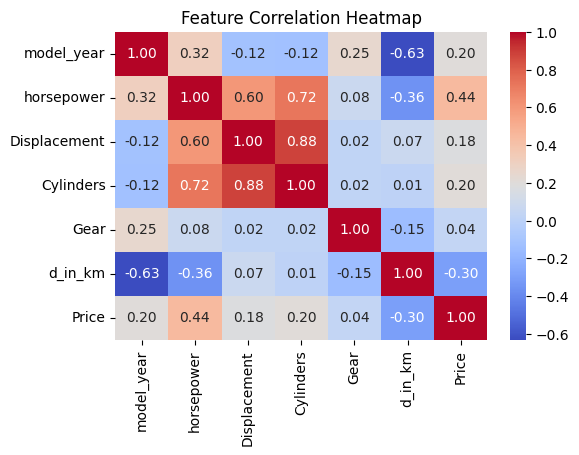

In [41]:
# Assuming 'data' is your DataFrame with features
correlation_matrix = df_num.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
df["fuel_type"].fillna("Electric",inplace=True)

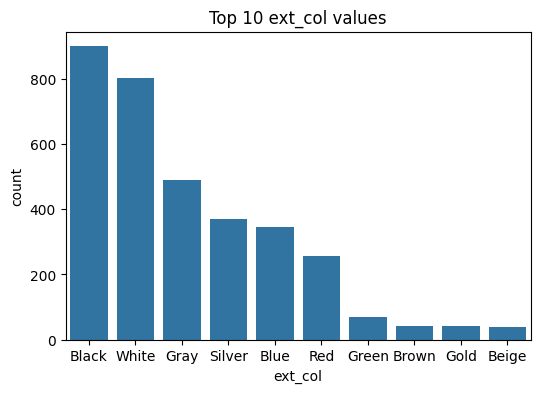

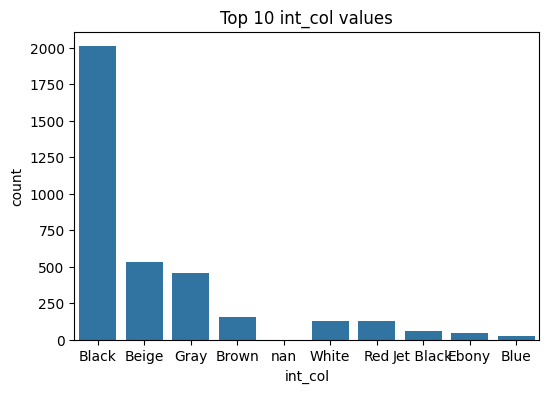

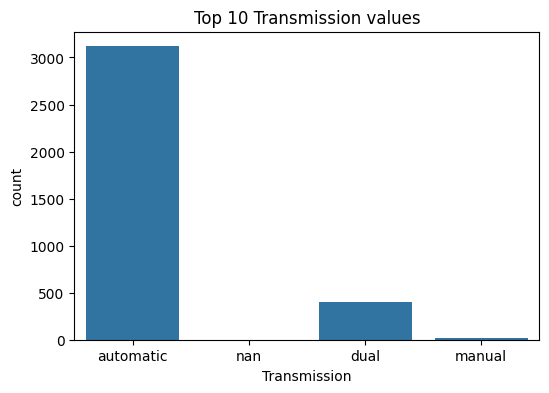

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your training dataset

graph = ["ext_col", "int_col", "Transmission"]

for col in graph:
    top_values = df[col].value_counts(dropna=False).head(10)

    # Create subplots for better visualization
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=top_values.index)
    plt.title(f'Top 10 {col} values')
    plt.show()

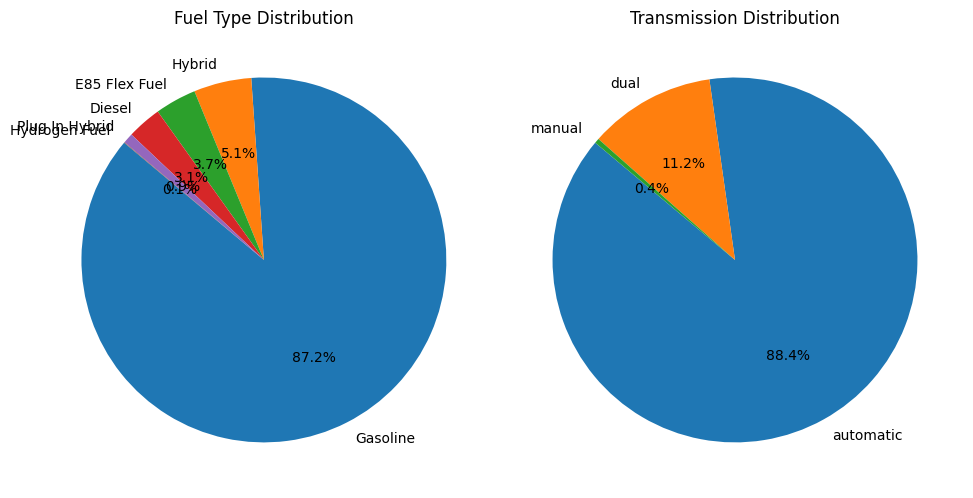

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'fuel_type' and 'transmission' columns

# Count the occurrences of each fuel type
fuel_type_counts = df['fuel_type'].value_counts()

# Count the occurrences of each transmission type
transmission_counts = df['Transmission'].value_counts()

# Plotting pie chart for fuel_type
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')

# Plotting pie chart for transmission
plt.subplot(1, 2, 2)
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Distribution')

plt.tight_layout()
plt.show()


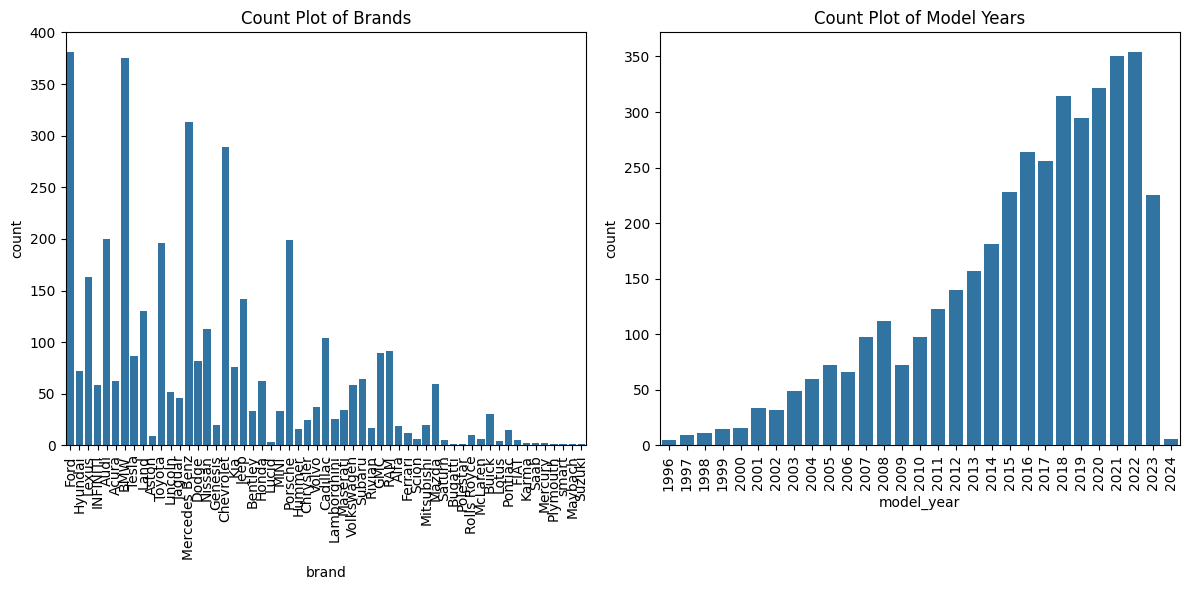

In [60]:
plt.figure(figsize=(12, 6))

# Plot the count plot for brand
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='brand')
plt.title('Count Plot of Brands')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Plot the count plot for model_year
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='model_year')
plt.title('Count Plot of Model Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(df['horsepower'], df['Price'], marker='o', linestyle='-')
plt.title('Line Plot of Distance vs Price')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.grid(True)  # Add gridlines for better readability
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

In [13]:
# # we are handiling null values of these 3 columns which are categorical before spliting because of encoding part:
from sklearn.impute import SimpleImputer
columns = ['ext_col', 'int_col', 'Transmission']
si = SimpleImputer(strategy='most_frequent')
df[columns] = si.fit_transform(df[columns])

In [14]:
categorical_cols = ['brand','model','model_year', 'fuel_type', 'ext_col', 'int_col', 'clean_title', 'Transmission']
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [15]:
df.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'ext_col', 'int_col',
       'accident', 'clean_title', 'horsepower', 'Displacement', 'Cylinders',
       'Gear', 'Transmission', 'd_in_km', 'Price'],
      dtype='object')

In [16]:
df['accident'] = df['accident'].astype(int)

In [17]:
df.isnull().sum()[df.isnull().sum()>0]

horsepower       197
Displacement     193
Cylinders        900
Gear            1428
dtype: int64

## OUTLIERS

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3964 entries, 0 to 3963
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3964 non-null   object 
 1   model         3964 non-null   object 
 2   model_year    3964 non-null   int64  
 3   fuel_type     3794 non-null   object 
 4   ext_col       3949 non-null   object 
 5   int_col       3835 non-null   object 
 6   accident      3964 non-null   int64  
 7   clean_title   3964 non-null   object 
 8   horsepower    3767 non-null   float64
 9   Displacement  3771 non-null   float64
 10  Cylinders     3064 non-null   float64
 11  Gear          2536 non-null   float64
 12  Transmission  3529 non-null   object 
 13  d_in_km       3964 non-null   float64
 14  Price         3964 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 464.7+ KB


In [19]:
num_list=['horsepower','Displacement','Cylinders','Gear','Transmission','d_in_km','Price']

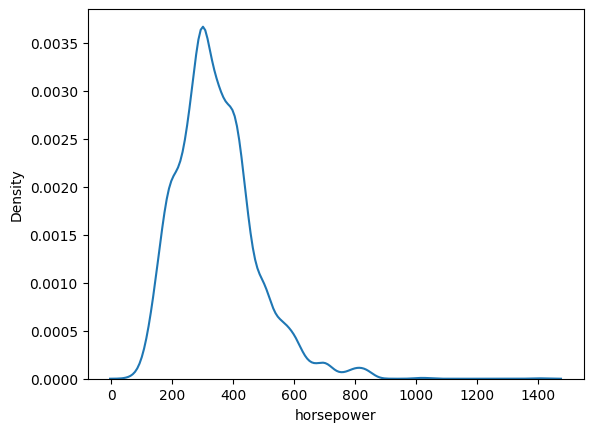

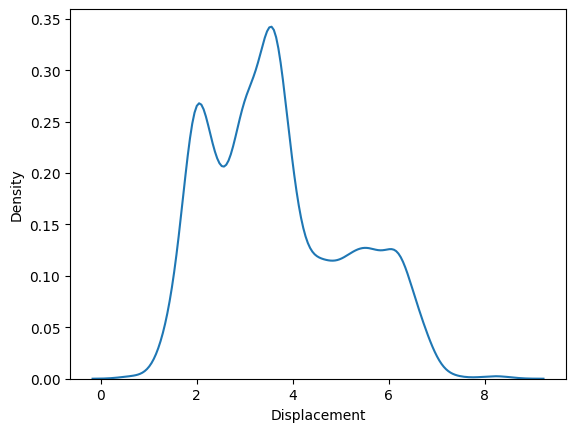

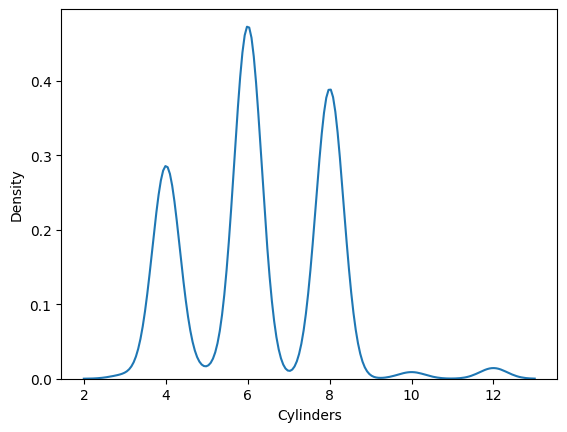

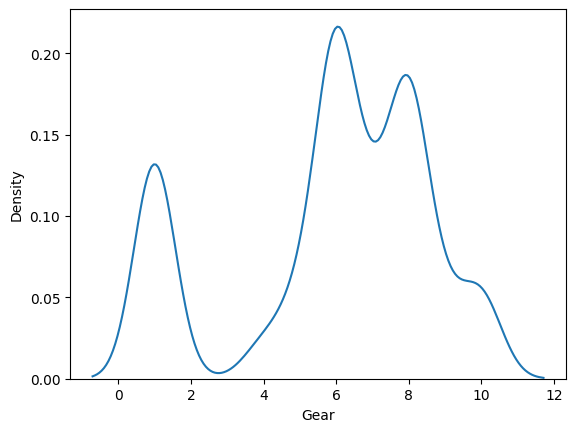

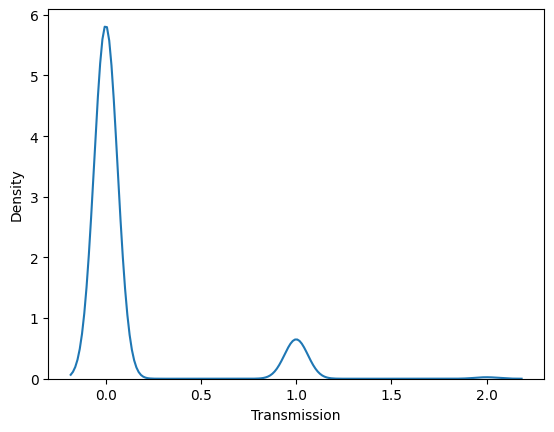

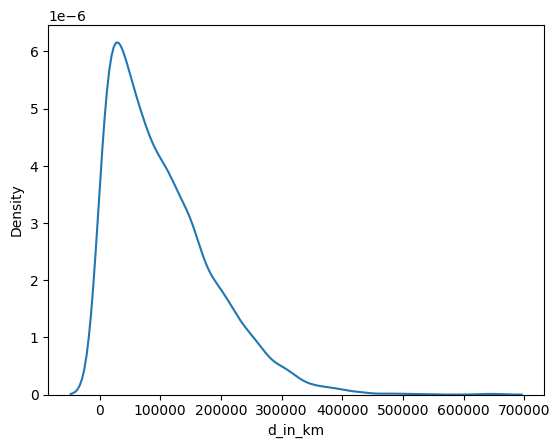

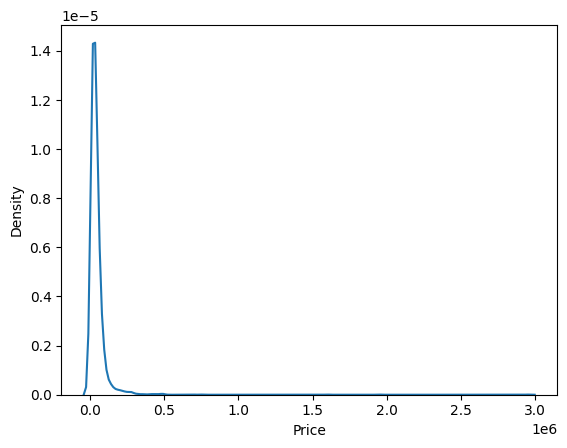

In [20]:
for x in num_list:
  sns.kdeplot(df[x])
  plt.show()

In [21]:
df['Price']=np.log(df['Price'])

In [22]:
def zscore_limit(col, df):
  lb = (-3)* df[col].std() + df[col].mean()
  ub = (3)* df[col].std() + df[col].mean()
  temp = df[(df[col] > ub) | (df[col] < lb)]
  print(f"number of outliers in {col}: {len(temp)}")
  print(f"percentage of outliers: {round(len(temp)/len(df) * 100, 2)} %")
  return (lb,ub)

In [23]:
zscore_limit('Price',df)

number of outliers in Price: 23
percentage of outliers: 0.58 %


(7.77399285758618, 12.844643819234879)

In [24]:
zscore_limit('d_in_km',df)

number of outliers in d_in_km: 39
percentage of outliers: 0.98 %


(-147241.63243858036, 353185.2901580556)

In [25]:
# capping the outliers (d_in_km)
df["d_in_km"] = np.where(
                      df["d_in_km"] > 691.6404175195745,
                      691.6404175195745,
                      np.where(df["d_in_km"] < -107.77582880377406,
                              -107.77582880377406,
                               df["d_in_km"]))

In [26]:
 df[df["Price"] > 12.844643819234879]

,brand,model,model_year,fuel_type,ext_col,int_col,accident,clean_title,horsepower,Displacement,Cylinders,Gear,Transmission,d_in_km,Price
179,43.0,151.0,22.0,3.0,29.0,14.0,0,1.0,450.0,3.8,NaN,7.0,0.0,691.640418,12.942040
202,14.0,770.0,9.0,3.0,302.0,14.0,0,0.0,NaN,5.4,NaN,NaN,2.0,691.640418,12.971536
228,6.0,1732.0,15.0,3.0,302.0,151.0,0,1.0,1400.0,8.0,NaN,7.0,0.0,691.640418,14.483850
302,46.0,1190.0,17.0,3.0,310.0,14.0,0,1.0,700.0,6.8,NaN,8.0,0.0,691.640418,13.099872
484,46.0,520.0,26.0,3.0,29.0,67.0,0,1.0,800.0,6.7,NaN,8.0,0.0,184.000000,13.016992
620,46.0,520.0,26.0,3.0,262.0,42.0,0,1.0,800.0,6.7,NaN,8.0,0.0,636.800000,13.451667
688,32.0,1251.0,9.0,3.0,233.0,10.0,1,1.0,394.0,4.2,8.0,1.0,1.0,691.640418,14.898699
972,25.0,286.0,23.0,3.0,38.0,14.0,0,1.0,759.0,6.5,12.0,NaN,0.0,691.640418,13.384726
1053,11.0,1733.0,21.0,3.0,29.0,14.0,0,1.0,645.0,8.4,10.0,NaN,0.0,691.640418,13.102150
1135,43.0,154.0,20.0,3.0,302.0,16.0,0,1.0,500.0,4.0,NaN,6.0,2.0,691.640418,13.100118


In [27]:
# capping the outliers(Price)
df["Price"] = np.where(
                      df["Price"] > 12.844643819234879,
                      12.844643819234879,
                      np.where(df["Price"] < 7.77399285758618,
                               7.77399285758618,
                               df["Price"]))

In [28]:
 df[df["Price"] > 12.844643819234879]

,brand,model,model_year,fuel_type,ext_col,int_col,accident,clean_title,horsepower,Displacement,Cylinders,Gear,Transmission,d_in_km,Price


In [29]:
df.isnull().sum()

brand              0
model              0
model_year         0
fuel_type          0
ext_col            0
int_col            0
accident           0
clean_title        0
horsepower       197
Displacement     193
Cylinders        900
Gear            1428
Transmission       0
d_in_km            0
Price              0
dtype: int64

## splitting


In [30]:
X=df.drop(columns=['Price'])
y=df['Price']

In [31]:
train, test, target, target_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)
print(f"shape of X: {X.shape}")
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X: (3964, 14)
shape of X_train: (2536, 14)
shape of X_test: (635, 14)
shape of y_train: (2536,)
shape of y_test: (635,)


In [33]:
# X_test[X_test['brand']=='Karma']

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 1833 to 3208
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         2536 non-null   float64
 1   model         2536 non-null   float64
 2   model_year    2536 non-null   float64
 3   fuel_type     2536 non-null   float64
 4   ext_col       2536 non-null   float64
 5   int_col       2536 non-null   float64
 6   accident      2536 non-null   int32  
 7   clean_title   2536 non-null   float64
 8   horsepower    2403 non-null   float64
 9   Displacement  2405 non-null   float64
 10  Cylinders     1930 non-null   float64
 11  Gear          1617 non-null   float64
 12  Transmission  2536 non-null   float64
 13  d_in_km       2536 non-null   float64
dtypes: float64(13), int32(1)
memory usage: 287.3 KB


In [35]:
# handling missing values
from sklearn.impute import SimpleImputer
missing_values=["horsepower","Displacement","Cylinders","Gear"]
si=SimpleImputer(strategy='median')
X_train[missing_values] = si.fit_transform(X_train[missing_values])
X_test[missing_values] = si.transform(X_test[missing_values])

In [36]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Series([], dtype: int64)

In [37]:
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)

In [38]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [39]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse

    ytrain = model.predict(X_train)
    ytest = model.predict(X_test)

    print('y_train= ', y_train[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(y_train, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(y_train, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(y_train, ytrain), 2)
    print('acc(rmse) for train =', acc_train_rmse_num)
    print("--------------------------------------------")
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('y_test =', y_test[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(y_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_d_num = round(acc_d(y_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)

    acc_test_rmse_num = round(acc_rmse(y_test, ytest), 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [40]:
 linreg = LinearRegression()
linreg.fit(X_train, y_train)
acc_model(0,linreg,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.30032418 10.07699156 10.74655251  9.66148262 10.39025714]
acc(r2_score) for train = 68.42
acc(relative error) for train = 3.39
acc(rmse) for train = 0.47
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.94975401 10.57807869 10.9599603  10.42399211 10.66936613]
acc(r2_score) for test = 73.51
acc(relative error) for test = 3.34
acc(rmse) for test = 0.45


In [41]:
# Support Vector Machines
svr = SVR()
svr.fit(X_train,y_train )
acc_model(1,svr,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [ 9.86110942  9.90479892 10.58385471  9.52241008 10.53224234]
acc(r2_score) for train = 52.31
acc(relative error) for train = 4.35
acc(rmse) for train = 0.58
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.61178416 10.61346847 10.89471478  9.90936939 10.64093663]
acc(r2_score) for test = 54.29
acc(relative error) for test = 4.56
acc(rmse) for test = 0.59


In [42]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)
acc_model(2,linear_svr,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [11.75581782 11.48111041 12.85816998 10.71595557 12.16842797]
acc(r2_score) for train = -294.29
acc(relative error) for train = 15.06
acc(rmse) for train = 1.66
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [12.54355396 12.08161351 12.72487493 11.89068865 12.55974816]
acc(r2_score) for test = -255.54
acc(relative error) for test = 15.06
acc(rmse) for test = 1.64


In [43]:
# Stochastic Gradient Descent

sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
acc_model(3,sgd,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [-3.55896451e+14 -3.05314735e+14 -5.05815121e+14  4.11049436e+12
 -4.27119756e+14]
acc(r2_score) for train = -1.076578281791112e+31
acc(relative error) for train = 2248814270168576.2
acc(rmse) for train = 273724847372156.8
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [-2.30093658e+14 -1.58323789e+14 -1.50639500e+14 -1.48626799e+14
 -5.40956442e+14]
acc(r2_score) for test = -9.623394124030873e+30
acc(relative error) for test = 2193716443800910.5
acc(rmse) for test = 270175397793591.2


In [44]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
acc_model(4,decision_tree,train,test)
# important_features(decision_tree)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
acc(r2_score) for train = 99.98
acc(relative error) for train = 0.01
acc(rmse) for train = 0.01
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.88743693 10.22194128 10.85897977 10.59663473 10.29214554]
acc(r2_score) for test = 71.29
acc(relative error) for test = 3.2
acc(rmse) for test = 0.47


In [45]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=24)
random_forest=random_forest.fit(X_train, y_train)
acc_model(5,random_forest,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.38185409 10.42601682 10.76783445  9.47221307 10.03437208]
acc(r2_score) for train = 89.9
acc(relative error) for train = 1.82
acc(rmse) for train = 0.27
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.80250313 10.11030546 10.84516873 10.5763586  10.31605554]
acc(r2_score) for test = 85.39
acc(relative error) for test = 2.4
acc(rmse) for test = 0.33


<Axes: xlabel='Imp', ylabel='Varname'>

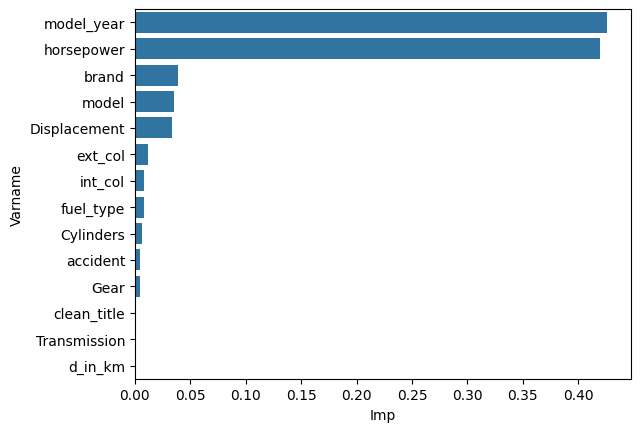

In [46]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": random_forest.feature_importances_
})

imp_df.sort_values(by = ["Imp"], ascending = False, inplace = True)


sns.barplot(data=imp_df.sort_values(by="Imp", ascending=False), x="Imp", y="Varname")

In [47]:
 # AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(X_train, y_train)
acc_model(6, Ada_Boost, X_train, X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.84455164 10.52646307 11.02435276  9.67163527 10.22868438]
acc(r2_score) for train = 68.82
acc(relative error) for train = 3.65
acc(rmse) for train = 0.47
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [11.36810886 10.29553326 11.149717   10.69195733 10.48914265]
acc(r2_score) for test = 72.63
acc(relative error) for test = 3.5
acc(rmse) for test = 0.46


In [48]:
# Extra Trees Regressor
etr = ExtraTreesRegressor(random_state=0)
etr.fit(X_train, y_train)
acc_model(7,etr,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
acc(r2_score) for train = 99.98
acc(relative error) for train = 0.01
acc(rmse) for train = 0.01
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.90113608 10.18560414 10.98915451 10.56082548 10.35656914]
acc(r2_score) for test = 85.87
acc(relative error) for test = 2.32
acc(rmse) for test = 0.33


In [49]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(X_train, y_train)
acc_model(8,bagging,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.30308483 10.4197412  10.79124818  9.50103732  9.87331242]
acc(r2_score) for train = 96.33
acc(relative error) for train = 1.03
acc(rmse) for train = 0.16
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.58981551 10.06142875 10.94430981 10.63071818 10.46719949]
acc(r2_score) for test = 85.8
acc(relative error) for test = 2.34
acc(rmse) for test = 0.33


In [50]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
acc_model(9,ridge,X_train,X_test)

y_train=  [10.25748391 10.37349118 10.6454249   9.66459564  9.79255599]
ytrain =  [10.29721348 10.07758529 10.74232195  9.66132138 10.3879659 ]
acc(r2_score) for train = 68.42
acc(relative error) for train = 3.38
acc(rmse) for train = 0.47
--------------------------------------------
y_test = [10.76848499 10.16585182 10.73639668 10.63344871 10.47728798]
ytest = [10.94656913 10.57257295 10.96633467 10.42453709 10.66689525]
acc(r2_score) for test = 73.52
acc(relative error) for test = 3.33
acc(rmse) for test = 0.45


In [51]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVR',
               'Stochastic Gradient Decent', 'Decision Tree Regressor', 'Random Forest','AdaBoost Regression',
               'Extra Trees Regressor','Bagging Regressor',
             'Ridge Regressor'],

    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [52]:
pd.options.display.float_format = '{:,.2f}'.format

In [53]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,rmse_train,rmse_test
7,Extra Trees Regressor,99.98,85.87,0.01,0.33
8,Bagging Regressor,96.33,85.80,0.16,0.33
5,Random Forest,89.90,85.39,0.27,0.33
9,Ridge Regressor,68.42,73.52,0.47,0.45
0,Linear Regression,68.42,73.51,0.47,0.45
6,AdaBoost Regression,68.82,72.63,0.47,0.46
4,Decision Tree Regressor,99.98,71.29,0.01,0.47
1,Support Vector Machines,52.31,54.29,0.58,0.59
2,Linear SVR,-294.29,-255.54,1.66,1.64
3,Stochastic Gradient Decent,"-10,765,782,817,911,120,404,401,293,885,440.00","-9,623,394,124,030,873,298,019,222,028,288.00","273,724,847,372,156.81","270,175,397,793,591.19"


## Pipeline


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [70]:
df

,brand,model,model_year,fuel_type,ext_col,int_col,accident,clean_title,horsepower,Displacement,Cylinders,Gear,Transmission,d_in_km,Price
0,14.00,"1,722.00",17.00,1.00,29.00,14.00,1,1.00,300.00,3.70,6.00,6.00,0.00,691.64,9.24
1,19.00,"1,166.00",25.00,3.00,184.00,70.00,1,1.00,333.00,3.80,NaN,8.00,0.00,691.64,10.55
2,27.00,"1,307.00",26.00,3.00,38.00,14.00,0,0.00,NaN,3.50,NaN,NaN,0.00,691.64,10.91
3,20.00,"1,224.00",19.00,4.00,29.00,14.00,0,1.00,354.00,3.50,6.00,7.00,0.00,691.64,9.65
4,3.00,"1,207.00",25.00,3.00,119.00,14.00,0,0.00,416.00,2.00,NaN,8.00,0.00,691.64,10.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,5.00,475.00,27.00,3.00,50.00,74.00,0,1.00,650.00,6.00,NaN,8.00,0.00,691.64,12.77
3960,3.00,"1,445.00",26.00,3.00,29.00,14.00,0,1.00,349.00,3.00,6.00,1.00,1.00,691.64,10.89
3961,43.00,"1,656.00",26.00,2.00,29.00,14.00,0,0.00,NaN,NaN,NaN,NaN,0.00,691.64,11.42
3962,14.00,654.00,24.00,3.00,38.00,14.00,0,1.00,450.00,3.50,6.00,NaN,0.00,691.64,11.05


In [56]:
trf1 = ColumnTransformer([
    ('ordinal_cols', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1), [0,1,3,4,5,7,12])
    ], remainder='passthrough')

In [57]:
trf2 = ColumnTransformer([
    ('impute_cat_cols', SimpleImputer(strategy='most_frequent'), [4,5,12]),
    ('impute_num_cols', SimpleImputer(strategy='median'), [8,9,10,11])
], remainder='passthrough')

In [58]:
trf3 = ColumnTransformer([
    ('scale', StandardScaler(), slice(0,14))
])

In [59]:
trf4 = RandomForestRegressor()

In [60]:
pipe = Pipeline([

    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_cols',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [0, 1, 3, 4, 5, 7, 12])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_cat_cols',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4, 5, 12]),
                                                 ('impute_num_cols',
                                                  SimpleImputer(strategy='median'),
                                                  [8, 9, 10, 11])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 14, None))])),
                ('trf4', RandomForestRegressor())])

In [61]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal_cols',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  [0, 1, 3, 4, 5, 7, 12])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_cat_cols',
                                  SimpleImputer(strategy='most_frequent'),
                                  [4, 5, 12]),
                                 ('impute_num_cols',
                                  SimpleImputer(strategy='median'),
                                  [8, 9, 10, 11])]),
 'trf3': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 14, None))]),
 'trf4': RandomForestRegressor()}

In [62]:
from sklearn import set_config
set_config(display='diagram')


In [63]:
test_input = np.array([19,1722, 18, 1, 38, 70, 1, 1, 5.87, 3.50, 6.00, 7.00, 0.00, 235.77],dtype=object).reshape(1,14)

In [64]:
random_forest.predict(test_input)

array([9.4676708])

In [65]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_cols',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [0, 1, 3, 4, 5, 7, 12])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_cat_cols',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4, 5, 12]),
                                                 ('impute_num_cols',
                                                  SimpleImputer(strategy='median'),
                                                  [8, 9, 10, 11])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 14, None))])),
                ('trf4', RandomForestRegressor())])

In [66]:
pipe.predict(X_test)

array([10.7555226 , 10.18451987, 10.83030116, 10.54438014, 10.30827284,
        9.30211383, 10.06979912,  9.20067861, 10.41654741, 11.48865021,
        9.89390314,  9.61690444, 10.74035323,  9.41579603, 11.21536679,
        9.80433533,  9.65532926, 10.05760147,  9.78868117,  8.89941198,
       10.94336242,  9.37106944, 10.95812182, 10.68790258,  9.82816064,
       10.0891791 , 10.64595478, 10.14786059, 10.51800089,  9.66902371,
        9.88339782,  9.28028233,  9.7370861 ,  9.7488304 ,  9.47561034,
        9.75546703,  9.73439799,  9.34881432,  8.27353961, 10.79136937,
       10.58483183, 11.06705205,  9.77303875,  9.95968419, 10.58768334,
        9.049519  ,  9.32437849, 10.12431139, 10.52348367, 10.58358668,
        9.18271787,  9.86462123, 10.62849959, 10.47204289,  8.87057854,
        9.30051189, 11.72472158,  8.77089122,  9.61383614, 11.06465495,
       10.37230865,  9.78417366,  8.4580848 , 10.20975534, 10.32264217,
       11.66619581,  9.64022462,  9.6221122 ,  9.86373304, 10.23

In [67]:
pipe.predict(test_input)

array([9.35118072])

In [340]:
import pickle

# Assuming 'pipe' is your fitted pipeline

# Define the filename for the exported model
filename = 'Car_price.pkl'

# Save the model and pipeline to a file
with open(filename, 'wb') as file:
    pickle.dump(pipe, file)


In [341]:
import pickle
from sklearn.metrics import accuracy_score

# Load the model from the .pkl file
with open('used_cars.pkl', 'rb') as file:
    loaded_pipe = pickle.load(file)

# Assuming X_test and y_test are your test data and labels, respectively
# Make predictions using the loaded model
predictions = loaded_pipe.predict(X_test)

# Evaluate the performance of the loaded model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


FileNotFoundError: [Errno 2] No such file or directory: 'used_cars.pkl'

In [ ]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=24)
random_forest=random_forest.fit(X_train, y_train)
acc_model(5, random_forest, X_train, X_test)